In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
corona_df = pd.read_csv('../Test/corona.csv')
corona_df

,Date,Accume,Daily
0,2020-1-20\t,1,1
1,2020-1-26\t,2,1
2,2020-1-27\t,3,1
3,2020-1-30\t,4,1
4,2020-1-31\t,6,2
...,...,...,...
312,2020-12-8,38755,594
313,2020-12-9,39432,677
314,2020-12-10,40098,666
315,2020-12-11,40786,688


In [5]:
corona_df["Date"] = corona_df["Date"].apply(lambda x: str(x).replace("\t", ""))
corona_df

,Date,Accume,Daily
0,2020-1-20,1,1
1,2020-1-26,2,1
2,2020-1-27,3,1
3,2020-1-30,4,1
4,2020-1-31,6,2
...,...,...,...
312,2020-12-8,38755,594
313,2020-12-9,39432,677
314,2020-12-10,40098,666
315,2020-12-11,40786,688


In [6]:
corona_df.set_index('Date',inplace=True)
corona_df

,Accume,Daily
Date,,
2020-1-20,1,1
2020-1-26,2,1
2020-1-27,3,1
2020-1-30,4,1
2020-1-31,6,2
...,...,...
2020-12-8,38755,594
2020-12-9,39432,677
2020-12-10,40098,666


In [7]:
corona_df.index = pd.to_datetime(corona_df.index)

In [8]:
corona_df_resample = corona_df.resample('D').mean()
display(corona_df_resample)

,Accume,Daily
Date,,
2020-01-20,1.0,1.0
2020-01-21,NaN,NaN
2020-01-22,NaN,NaN
2020-01-23,NaN,NaN
2020-01-24,NaN,NaN
...,...,...
2020-12-08,38755.0,594.0
2020-12-09,39432.0,677.0
2020-12-10,40098.0,666.0


In [9]:
corona_df['Daily'].describe()

count     317.000000
mean      131.615142
std       169.649220
min         1.000000
25%        33.000000
50%        63.000000
75%       144.000000
max      1062.000000
Name: Daily, dtype: float64

In [10]:
corona_df_resample_linear = corona_df_resample.interpolate(method='values')
corona_df_resample_linear

,Accume,Daily
Date,,
2020-01-20,1.000000,1.0
2020-01-21,1.166667,1.0
2020-01-22,1.333333,1.0
2020-01-23,1.500000,1.0
2020-01-24,1.666667,1.0
...,...,...
2020-12-08,38755.000000,594.0
2020-12-09,39432.000000,677.0
2020-12-10,40098.000000,666.0


In [11]:
corona_df_resample['Daily'] = corona_df_resample['Daily'].dropna()
corona_df_MVA_weak = corona_df_resample['Daily'].rolling(window=7).mean() ## Moving average 7 days
corona_df_MVA_weak

Date
2020-01-20           NaN
2020-01-21           NaN
2020-01-22           NaN
2020-01-23           NaN
2020-01-24           NaN
                 ...    
2020-12-08    586.142857
2020-12-09    609.857143
2020-12-10    627.857143
2020-12-11    636.285714
2020-12-12    688.714286
Freq: D, Name: Daily, Length: 328, dtype: float64

In [12]:
corona_df_MVA_month = corona_df_resample['Daily'].rolling(window=30).mean() ## Moving average 7 days
corona_df_MVA_month

Date
2020-01-20           NaN
2020-01-21           NaN
2020-01-22           NaN
2020-01-23           NaN
2020-01-24           NaN
                 ...    
2020-12-08    377.600000
2020-12-09    395.966667
2020-12-10    414.833333
2020-12-11    432.900000
2020-12-12    459.800000
Freq: D, Name: Daily, Length: 328, dtype: float64

In [13]:
corona_df_resample_linear['Daily'].loc['2020-03-02']

1062.0

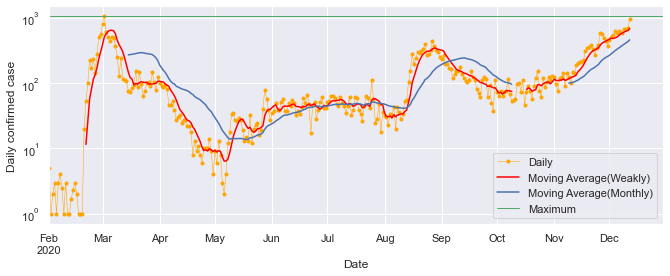

In [14]:
sns.set(rc={'figure.figsize':(11,4)})
corona_df_resample_linear['Daily'].plot(linewidth=0.5,alpha=1,color='orange',linestyle='-',marker='.',label='Daily')
corona_df_MVA_weak.plot(linewidth=1.5,alpha=1,color='red',label='Moving Average(Weakly)')
corona_df_MVA_month.plot(linewidth=1.5,alpha=1,color='b',label='Moving Average(Monthly)')
plt.ylabel("Daily confirmed case")
plt.xlim(['2020-02-01','2020-12-30'])
plt.axhline(y=1062, color='g', linewidth=1,label="Maximum")
plt.yscale('log')
plt.legend()

In [17]:
def bb(x, w=20, k=2):
    """
    Calculate Bollinger Bands
    ubb = MA_w(x) + k * sd(x)
    mbb = MA_w(x)
    lbb = MA_w(x) - k * sd(x)
    :param x:
    :return: (ubb, mbb, lbb)
    """
    
    x = pd.Series(x)
    
    x_axis = x.index.get_level_values(0)
   
    
    mbb = x.rolling(w).mean()
    ubb = mbb + k * x.rolling(w).std()
    lbb = mbb - k * x.rolling(w).std()
    ubb.plot(x='Date', y='UBB',label='mva upper bound')
    mbb.plot(x='Date', y='MBB',color='red',label='monthly mva')
    x.plot(x='Date', y='Daily', color='orange',linestyle='-',marker='.',label='Daily')
    lbb.plot(x='Date', y='2std mva lower',label='mva lower bound')
    plt.fill_between(x_axis,ubb,lbb,color="grey")
    plt.xlim(['2020-02-01','2020-12-30'])

    plt.ylabel('Daily confirmed case')
    plt.axhline(y=1062, color='g', linewidth=1,label="Maximum")
    plt.legend()
    plt.show()

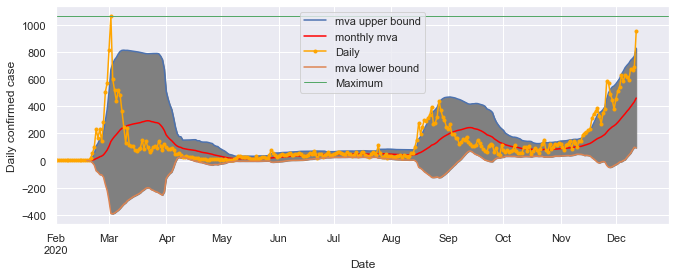

In [18]:
bb(corona_df_resample_linear['Daily'], w=30, k=2)